In [246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

import datetime 

import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['round2', 'round2csv']


In [247]:
def load_data(debug=False):
    if debug:
        nrows = 10000
    else:
        nrows = None
    print('Loading data')
    df = pd.read_csv('../input/round2csv/hackathon_data_round2.csv',nrows=nrows)
    df.rename(columns={'Donation_Date ':'Date','Financial_Year ':'Financial_Year'},inplace=True)
    return df

In [248]:
def preprocessing(df):
    print('Preprocessing')
    df['Date'] = pd.to_datetime(df['Date'])
    df['to_drop'] = df['Date'].dt.year.apply(lambda x:1 if x not in [2013,2014,2015,2016,2017,2018,2019] else 0)
    df.drop(df[df['to_drop']==1].index,axis=0,inplace=True)
    print('Minimum date in in data is {}'.format(min(df['Date'])))
    print('Maximum date in in data is {}'.format(max(df['Date'])))
    
    df.sort_values('Date',inplace=True)
    df['Date_Month'] = df['Date'].dt.to_period('M')
    df['Weeks'] = ((datetime.datetime.today() - df['Date']).dt.days)//7
    df.set_index('Date_Month',inplace=True)
    mask = (df['C1']=='R') | (df['C1']=='P') | (df['C2']=='R') | (df['C2']=='P')|(df['Test_3']=='R') | (df['Test_3']=='P') | (df['Test_4']=='R') | (df['Test_4']=='P')
    df['Is_Bad'] = np.where(mask,1,0)
    
    return df

In [249]:
def features_TS(df):
    df['Blood_Group_Code_1'] = df['Blood_Group_Code'].apply(lambda x:1 if x==1 else 0)
    df['Blood_Group_Code_3'] = df['Blood_Group_Code'].apply(lambda x:1 if x==3 else 0)
    df['Blood_Group_Code_5'] = df['Blood_Group_Code'].apply(lambda x:1 if x==5 else 0)
    df['Blood_Group_Code_7'] = df['Blood_Group_Code'].apply(lambda x:1 if x==7 else 0)
    return df

In [250]:
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
def model(group,col):
    X = group.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
#     error = mean_squared_error(test, predictions)
    error = mean_absolute_error(test, predictions)
    print('Test Mean Absolute Error for {}  = {}'.format(col,error))
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.title(col,fontsize=20)
    plt.savefig('{}.png'.format(col))
    plt.show()

In [251]:
df = load_data(debug=0)

Loading data


In [252]:
df.columns

Index(['Financial_Year', 'Branch_Code ', 'Sequence_1', 'Sequence_2',
       'Donation_type ', 'Donor_Age ', 'Date', 'Gender ', 'Blood_Group_Code',
       'Donor_Weight ', 'Donor_Temperature', 'Donor_Pulse', 'Donor_Hemoglobin',
       'Donor_Blood_Pressure', 'Test_1', 'C1', 'Test_2', 'C2', 'Test_3',
       'Test_4'],
      dtype='object')

In [253]:
numeric_feats = [col for col in df.columns if (df[col].dtypes!='O') & (col!='Sequence_1') & (col!='Sequence_2') ] 

Loading data
Preprocessing
Minimum date in in data is 2013-01-22 00:00:00
Maximum date in in data is 2018-07-06 00:00:00
predicted=828.167028, expected=869.000000
predicted=842.406508, expected=884.000000
predicted=856.739073, expected=792.000000
predicted=811.535616, expected=758.000000
predicted=823.734721, expected=910.000000
predicted=872.206209, expected=900.000000
predicted=848.097818, expected=801.000000
predicted=832.507043, expected=698.000000
predicted=804.915799, expected=718.000000
predicted=780.277217, expected=801.000000
predicted=811.059114, expected=852.000000
predicted=812.145501, expected=854.000000
predicted=812.144507, expected=838.000000
predicted=808.219995, expected=919.000000
predicted=858.498535, expected=889.000000
predicted=857.708971, expected=853.000000
predicted=864.580548, expected=747.000000
predicted=834.355944, expected=970.000000
predicted=914.502855, expected=1072.000000
predicted=947.262151, expected=652.000000
predicted=765.938397, expected=934.000

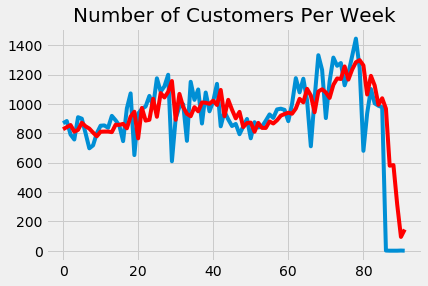

predicted=7.492922, expected=18.000000
predicted=13.227731, expected=7.000000
predicted=9.188412, expected=16.000000
predicted=9.676968, expected=7.000000
predicted=8.887989, expected=11.000000
predicted=9.364165, expected=22.000000
predicted=16.702925, expected=7.000000
predicted=12.275944, expected=5.000000
predicted=8.444983, expected=6.000000
predicted=7.591193, expected=13.000000
predicted=11.344240, expected=11.000000
predicted=12.941814, expected=8.000000
predicted=7.905838, expected=11.000000
predicted=8.678947, expected=10.000000
predicted=9.900917, expected=9.000000
predicted=10.112036, expected=6.000000
predicted=8.365145, expected=10.000000
predicted=8.678278, expected=15.000000
predicted=11.917945, expected=17.000000
predicted=13.277228, expected=12.000000
predicted=11.754039, expected=19.000000
predicted=13.473947, expected=16.000000
predicted=15.745295, expected=20.000000
predicted=16.985715, expected=14.000000
predicted=16.503040, expected=23.000000
predicted=17.565191,

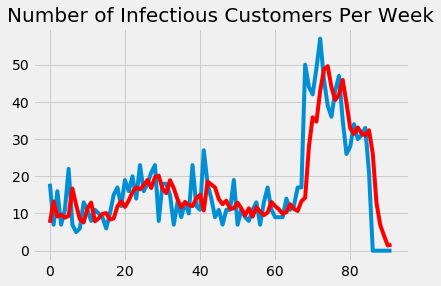

______________________________________
Prediction for Blood_Group_Code_1
______________________________________
predicted=191.879062, expected=208.000000
predicted=208.343203, expected=155.000000
predicted=181.919721, expected=164.000000
predicted=186.857145, expected=189.000000
predicted=193.336499, expected=195.000000
predicted=181.673605, expected=193.000000
predicted=190.348186, expected=164.000000
predicted=172.406627, expected=184.000000
predicted=185.797511, expected=167.000000
predicted=176.296605, expected=172.000000
predicted=178.796808, expected=181.000000
predicted=182.105540, expected=165.000000
predicted=167.144065, expected=192.000000
predicted=186.051806, expected=204.000000
predicted=186.034592, expected=211.000000
predicted=192.468323, expected=195.000000
predicted=193.369922, expected=147.000000
predicted=172.852493, expected=207.000000
predicted=205.885106, expected=219.000000
predicted=199.505404, expected=149.000000
predicted=171.292725, expected=214.000000
predic

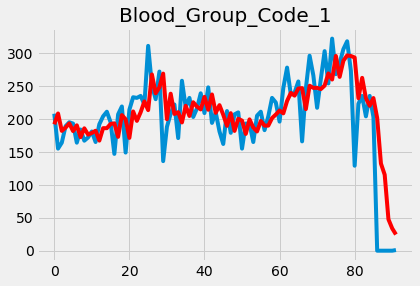

______________________________________
Prediction for Blood_Group_Code_3
______________________________________
predicted=267.591592, expected=266.000000
predicted=263.794314, expected=292.000000
predicted=277.293085, expected=259.000000
predicted=258.556980, expected=240.000000
predicted=258.187103, expected=299.000000
predicted=281.925654, expected=306.000000
predicted=284.030391, expected=291.000000
predicted=285.420376, expected=205.000000
predicted=251.389216, expected=248.000000
predicted=262.024454, expected=285.000000
predicted=280.775888, expected=272.000000
predicted=267.829464, expected=317.000000
predicted=289.690096, expected=273.000000
predicted=264.997319, expected=304.000000
predicted=287.995202, expected=275.000000
predicted=287.694413, expected=258.000000
predicted=274.556945, expected=229.000000
predicted=269.183750, expected=312.000000
predicted=287.897761, expected=341.000000
predicted=304.957571, expected=191.000000
predicted=242.129204, expected=342.000000
predic

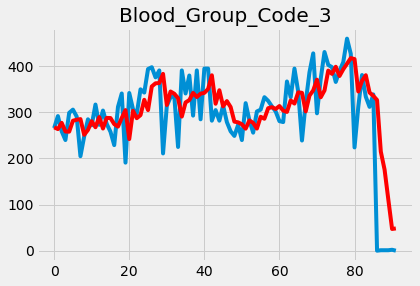

______________________________________
Prediction for Blood_Group_Code_5
______________________________________
predicted=252.678590, expected=268.000000
predicted=257.444443, expected=293.000000
predicted=269.045284, expected=241.000000
predicted=252.985441, expected=227.000000
predicted=256.322732, expected=269.000000
predicted=265.728918, expected=275.000000
predicted=256.819888, expected=232.000000
predicted=251.420144, expected=196.000000
predicted=238.935643, expected=211.000000
predicted=232.253111, expected=223.000000
predicted=225.953794, expected=261.000000
predicted=238.034616, expected=242.000000
predicted=232.317279, expected=243.000000
predicted=236.195596, expected=278.000000
predicted=257.933863, expected=274.000000
predicted=254.321512, expected=275.000000
predicted=268.293204, expected=261.000000
predicted=267.628324, expected=292.000000
predicted=277.688210, expected=342.000000
predicted=302.054397, expected=209.000000
predicted=254.484317, expected=258.000000
predic

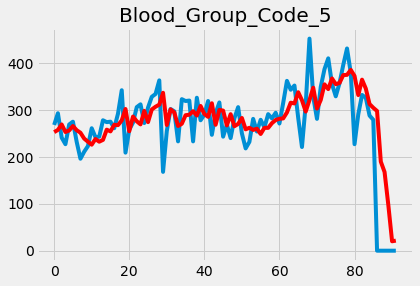

______________________________________
Prediction for Blood_Group_Code_7
______________________________________
predicted=72.005391, expected=64.000000
predicted=65.523564, expected=87.000000
predicted=71.771113, expected=80.000000
predicted=76.206823, expected=66.000000
predicted=65.512715, expected=95.000000
predicted=88.516915, expected=76.000000
predicted=73.106213, expected=78.000000
predicted=79.181251, expected=63.000000
predicted=79.020575, expected=50.000000
predicted=65.891779, expected=70.000000
predicted=76.914202, expected=81.000000
predicted=69.984708, expected=72.000000
predicted=65.857972, expected=86.000000
predicted=76.299923, expected=74.000000
predicted=71.252929, expected=65.000000
predicted=71.777681, expected=77.000000
predicted=80.701989, expected=56.000000
predicted=66.271395, expected=81.000000
predicted=77.055030, expected=92.000000
predicted=78.209001, expected=62.000000
predicted=64.172998, expected=64.000000
predicted=76.466085, expected=100.000000
predict

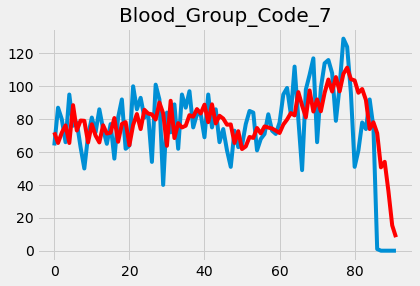

In [254]:
df = load_data(debug=0)
df = preprocessing(df)
df =features_TS(df)

group = df.groupby('Weeks').size()
model(group,'Number of Customers Per Week')

group = df.groupby('Weeks')['Is_Bad'].sum()
model(group,'Number of Infectious Customers Per Week')

columns = ['Blood_Group_Code_1','Blood_Group_Code_3','Blood_Group_Code_5','Blood_Group_Code_7']
for col in columns:
    group = df.groupby('Weeks')[col].sum()
    print('______________________________________')
    print('Prediction for {}'.format(col))
    print('______________________________________')
    model(group,col)

In [255]:
labels = df['Branch_Code '].value_counts().index
sizes = df['Branch_Code '].value_counts().values

fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "Branch",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Number Of Donors Per Branch",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Branch",
                "x": 0.17,
                "y": 0.5
            } ]}}
py.iplot(fig, filename='donut')


In [256]:
labels = df['Donation_type '].value_counts().index
sizes = df['Donation_type '].value_counts().values

fig = {
  "data": [
    {
      "values": sizes,
      "labels": labels,
      "domain": {"x": [0, .48]},
      "name": "Donation Type",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Number Of Donation Types",
#         "annotations": [
#             {
#                 "font": {
#                     "size": 30
#                 },
#                 "showarrow": False,
#                 "text": "Donation",
#                 "x": 0.17,
#                 "y": 0.5
#             } ]
  }}
py.iplot(fig, filename='donut')


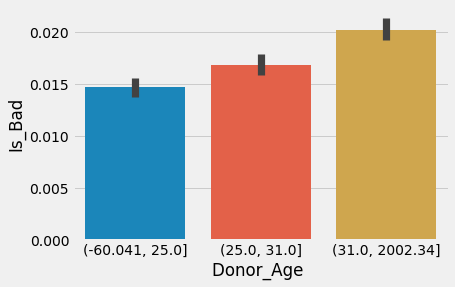

In [257]:
sns.barplot(pd.qcut(df['Donor_Age '],3),df['Is_Bad'])